# Aim:
To implement KNN algorithm for classification

Task 1: For the test data (1,1), determine the class using 
a)3-KNN, b) 5-KNN and c)7-KNN. 
Use below data set as training data set. Write your own user defined function for implementing KNN


![image.png](attachment:image.png)



Task 2: For the given Social_Network_Ads.csv dataset. Perform below operations

1. Upload the data set and store it in Pandas data frame

2. Explore the dataset using head, describe and size commands

3. Identify the input features and output feature

4. Identify the total number of classes in output feature

5. Remove columns that are not useful in classification

6. Convert categorical column into numeric column

7. Apply scalar transformation.

Task 3: Implement KNN algorithm on the given data set from Sklearn library with k=5.

1. Split the data set into train and test

2. Fit KNN model on train data set

3. Identify class for the test data set

4. Print confusion matrix

5. Print accuracy score

6. Write your inference

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import cv2

In [2]:
data= pd.read_csv('/content/test_knn.csv')
data

,a,b,c
0,2.781084,2.550537,0
1,1.465489,2.362125,0
2,3.396562,4.400294,0
3,1.388070,1.850220,0
4,3.064072,3.005306,0
5,7.627531,2.759262,1
6,5.332441,2.088627,1
7,6.922597,1.771064,1
8,8.675419,-0.242069,1
9,7.673756,3.508563,1


In [3]:
def e_distance(point1, point2):
    dist = math.sqrt(sum([(point1[i]-point2[i])**2 for i in range(len(point1))]))
    return dist

In [4]:
#Training data set
train_data = [([-1, 1], "N"), ([0, 1], "P"), ([0, 2], "N"), ([1, -1], "N"), ([1, 0], "P"), ([1, 2], "P"), ([2, 2], "N"), ([2, 3], "P")]

In [5]:
#Test data
test_data = [1, 1]

In [6]:
# Define KNN function using Euclidean distance
def knn(train, test, k):
    distances = []
    for point,label in train:
        dist = e_distance(point, test)
        distances.append((dist, label))
   
    sorted_distances = sorted(distances, key=lambda x: x[0])
    neighbors = [label for dist, label in sorted_distances[:k]]
   
    counts = {}
    for label in neighbors:
        counts[label] = counts.get(label, 0) + 1
    predicted_class = max(counts, key=counts.get)
   
    return predicted_class

In [7]:
#a)3-KNN
predicted_class = knn(train_data, test_data, k=3)
print("Class using 3-KNN:", predicted_class)

Class using 3-KNN: P


In [8]:
#b)5-KNN
predicted_class = knn(train_data, test_data, k=5)
print("Class using 5-KNN:", predicted_class)

Class using 5-KNN: P


In [9]:
#c)7-KNN
predicted_class = knn(train_data, test_data, k=7)
print("Class using 7-KNN:", predicted_class)

Class using 7-KNN: N


In [11]:
df=pd.read_csv('/content/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [12]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [13]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [14]:
df.size

2000

In [15]:
df.shape

(400, 5)

**#The Input is : GENDER,AGE, ESTIMATED SALARY *

*#The output is : PURCHASED COLUMN

In [16]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [17]:
df2=df
df2

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [18]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df2['Gender']=label_encoder.fit_transform(df2["Gender"])

In [19]:
df2

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [20]:
df2.drop(['User ID'], axis=1)

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [21]:
from sklearn.model_selection import train_test_split
x=df2.iloc[:,[1,2,3]].values

In [22]:
x

array([[    1,    19, 19000],
       [    1,    35, 20000],
       [    0,    26, 43000],
       ...,
       [    0,    50, 20000],
       [    1,    36, 33000],
       [    0,    49, 36000]])

In [23]:
y=df2.iloc[:,-1].values

In [24]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [26]:
x_train

array([[     1,     58, 144000],
       [     0,     59,  83000],
       [     0,     24,  55000],
       [     0,     26,  35000],
       [     0,     58,  38000],
       [     0,     42,  80000],
       [     0,     40,  75000],
       [     1,     59, 130000],
       [     0,     46,  41000],
       [     0,     41,  60000],
       [     1,     42,  64000],
       [     0,     37, 146000],
       [     0,     23,  48000],
       [     1,     25,  33000],
       [     1,     24,  84000],
       [     0,     27,  96000],
       [     1,     23,  63000],
       [     1,     48,  33000],
       [     1,     48,  90000],
       [     1,     42, 104000],
       [     0,     44,  39000],
       [     1,     32, 120000],
       [     0,     38,  50000],
       [     0,     32, 135000],
       [     0,     52,  21000],
       [     0,     53, 104000],
       [     1,     39,  42000],
       [     1,     38,  61000],
       [     0,     36,  50000],
       [     0,     36,  63000],
       [  

In [27]:
x_train.shape

(320, 3)

In [28]:
x_test.shape

(80, 3)

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [30]:
x_train

array([[ 1.02532046e+00,  1.92295008e+00,  2.14601566e+00],
       [-9.75304830e-01,  2.02016082e+00,  3.78719297e-01],
       [-9.75304830e-01, -1.38221530e+00, -4.32498705e-01],
       [-9.75304830e-01, -1.18779381e+00, -1.01194013e+00],
       [-9.75304830e-01,  1.92295008e+00, -9.25023920e-01],
       [-9.75304830e-01,  3.67578135e-01,  2.91803083e-01],
       [-9.75304830e-01,  1.73156642e-01,  1.46942725e-01],
       [ 1.02532046e+00,  2.02016082e+00,  1.74040666e+00],
       [-9.75304830e-01,  7.56421121e-01, -8.38107706e-01],
       [-9.75304830e-01,  2.70367388e-01, -2.87638347e-01],
       [ 1.02532046e+00,  3.67578135e-01, -1.71750061e-01],
       [-9.75304830e-01, -1.18475597e-01,  2.20395980e+00],
       [-9.75304830e-01, -1.47942605e+00, -6.35303205e-01],
       [ 1.02532046e+00, -1.28500455e+00, -1.06988428e+00],
       [ 1.02532046e+00, -1.38221530e+00,  4.07691369e-01],
       [-9.75304830e-01, -1.09058306e+00,  7.55356227e-01],
       [ 1.02532046e+00, -1.47942605e+00

In [31]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors= 5, p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [32]:
y_pred=classifier.predict(x_test)

In [33]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
ac=accuracy_score(y_test,y_pred)

In [35]:
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[53  5]
 [ 1 21]]


In [36]:
print('Accuracy Score:')
print(ac)

Accuracy Score:
0.925


In [37]:
#EXTRA Task
from sklearn import metrics
scores={}
scores_list=[]
for k in range(1,30):
  classifier1=KNeighborsClassifier(n_neighbors=k)
  classifier1.fit(x_train,y_train)
  y_pred1=classifier1.predict(x_test)
  temp=metrics.accuracy_score(y_test,y_pred1)
  scores[k]= temp
  scores_list.append(temp)


Text(0, 0.5, 'Testing accuracy')

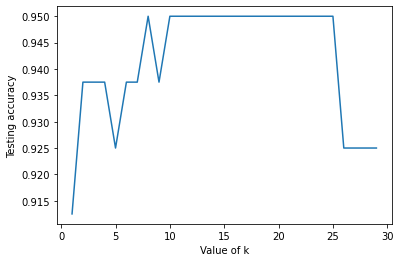

In [38]:
k_range=range(1,30)
plt.plot(k_range,scores_list)
plt.xlabel('Value of k')
plt.ylabel('Testing accuracy')